In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json

df = pd.read_json('../data/database-10-12.json')

#### Fülle alle NaN Werte aus `rankings` mit einem leeren Array

In [15]:
df['rankings'].fillna("[]")

0                                                      []
1                                                      []
2                                                      []
3                                                      []
4                                                      []
                              ...                        
7176    [{'timestamp': '10-12-2022--18-22-00', 'score'...
7177    [{'timestamp': '10-12-2022--18-44-00', 'score'...
7178    [{'timestamp': '10-12-2022--18-44-00', 'score'...
7179    [{'timestamp': '10-12-2022--19-33-00', 'score'...
7180    [{'timestamp': '10-12-2022--19-33-00', 'score'...
Name: rankings, Length: 7181, dtype: object

#### Füge ein neues Feature hinzu: Ranking besser als 5. Platz

In [16]:
def high_ranking(x):
    if (type(x) == list):
        return any(ranking['score'] <= 5 for ranking in x)
    return False

df['high_ranking'] = df['rankings'].apply(high_ranking)

#### Filter die Artikel nach: Hohes Ranking vorhanden

In [17]:
df = df.loc[df.high_ranking]

#### Gruppiere die Artikel nach: Themengebiet

In [18]:
df_ressort = df.groupby(["ressort"]).size().reset_index(name='amount')

#### Sortiere die Artikel nach: Anzahl Top-Rankings (absteigend)

In [19]:
df_ressort = df_ressort.sort_values(by='amount', ascending=False)

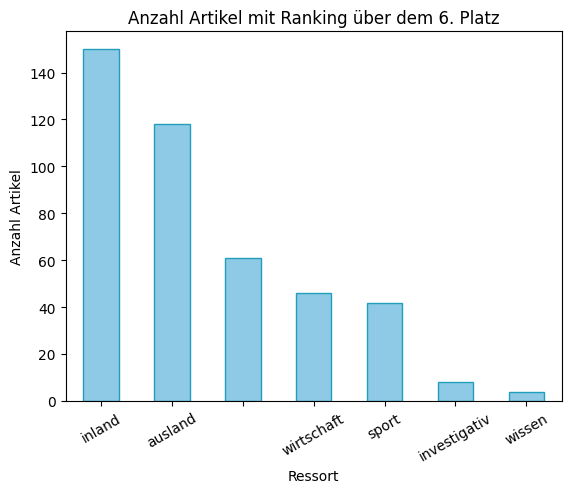

In [24]:
fig, ax1 = plt.subplots()

df_ressort.plot(ax=ax1, kind="bar", x='ressort', y='amount', xlabel="Ressort", ylabel="Anzahl Artikel", color=["#8ecae6"], legend=False, edgecolor=["#219ebc"], rot=30)

ax1.set_title('Anzahl Artikel mit Ranking über dem 6. Platz')

ax1.get_figure().savefig('figures/bar-ranking-ressort.png', bbox_inches="tight")

plt.show()